In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [33]:
#pip install plotly


In [3]:
df=pd.read_excel("/home/rguktongole/Downloads/Airbnb_Open_Data.xlsx")
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [34]:
#pip install openpyxl

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
df[df["neighbourhood group"]=="brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df[["price", "service fee"]].dtypes

price          float64
service fee    float64
dtype: object

In [9]:
print(df["price"].describe())       # summary statistics
print(df["service fee"].describe())

count    101811.000000
mean        625.355580
std         331.672649
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64
count    101785.000000
mean        125.039249
std          66.325905
min          10.000000
25%          68.000000
50%         125.000000
75%         183.000000
max         240.000000
Name: service fee, dtype: float64


In [10]:
#remove house_rules and license with insufficent
df.drop(["house_rules","license"],axis=1,inplace=True)

In [11]:
#replace dollar sign in price and service_free
df["price"]=df["price"].replace('$','', regex=False)
df["service fee"]=df["service fee"].replace('$','', regex=False)
#replace comma in price and service_free
df["price"]=df["price"].replace(',','', regex=False)
df["service fee"]=df["service fee"].replace(',','', regex=False)

In [12]:
df.rename(columns={"price":"price_$","service fee":"service_fee_$"},inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df["host id"]=df["host id"].astype(str)
df["id"]=df["id"].astype(str)
df["Construction year"]=df["Construction year"].astype(int)

In [15]:
#correct the brookln with Brooklyn
df.loc[df["neighbourhood group"]=="brookln","neighbourhood group"]=="Brooklyn"

13    False
Name: neighbourhood group, dtype: bool

In [16]:
#drop outliers that greater than 500
df=df.drop(df[df["availability 365"]>500].index)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [18]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [19]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [20]:
p_t=df["room type"].value_counts().to_frame()
p_t

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


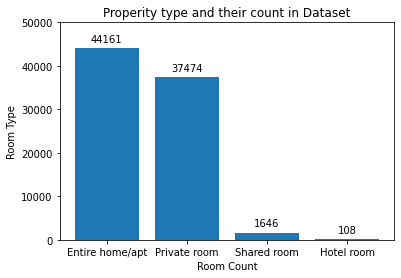

In [21]:
room_t_b=plt.bar(p_t.index,p_t.loc[:,"count"] )
plt.bar_label(room_t_b,labels=p_t.loc[:,"count"],padding=4)
plt.ylim(0,50000)
plt.ylabel("Room Type")
plt.xlabel("Room Count")
plt.title("Properity type and their count in Dataset")
plt.show()

* Entire homes/apartments are the most common property type (44,161 listings)
* Private rooms are also highly prevalent (37,474 listings)
* Shared rooms and hotel rooms represent a very small portion of the market

In [22]:
hood_group=df["neighbourhood group"].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34621
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816
brookln,1


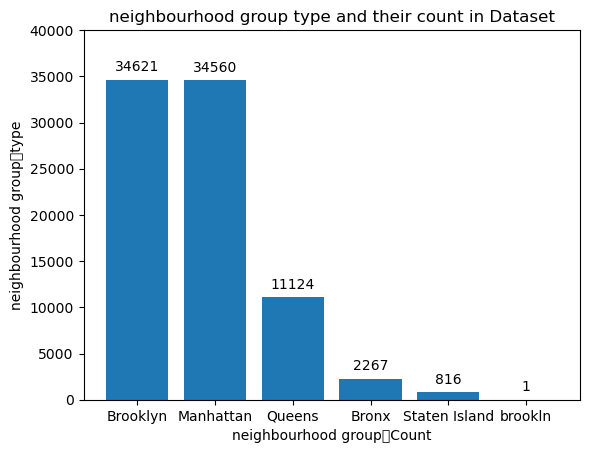

In [30]:
hood_group_b=plt.bar(hood_group.index,hood_group.loc[:,"count"] )
plt.bar_label(hood_group_b,labels=hood_group.loc[:,"count"],padding=4)
plt.ylim(0,40000)
plt.ylabel("neighbourhood group	type")
plt.xlabel("neighbourhood group	Count")
plt.title("neighbourhood group type and their count in Dataset")
#plt.xticks(rotation=45)
plt.show()

* Brooklyn and Manhattan dominate the Airbnb market with nearly equal listings (~34,600 each)
* Queens has a significant presence (11,124 listings)
* Bronx and Staten Island have relatively few listings, with Staten Island being the least represented

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


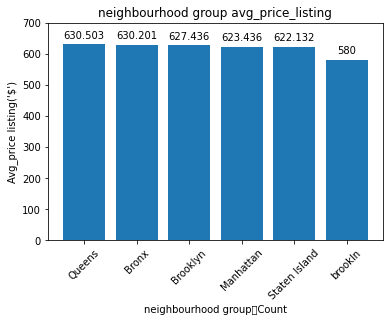

In [24]:
avg_price=df.groupby("neighbourhood group")["price_$"].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"])
plt.bar_label(avg_price_bar,label=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4)
plt.ylim([0,700])
plt.ylabel("Avg_price listing('$')")
plt.xlabel("neighbourhood group	Count")
plt.title("neighbourhood group avg_price_listing")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Avg_price for each properity in construction year')

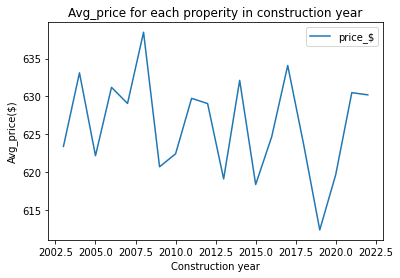

In [25]:
df.groupby(df["Construction year"])["price_$"].mean().to_frame().plot()
plt.ylabel("Avg_price($)")
plt.title("Avg_price for each properity in construction year")

### Top 10 hosts by calculated host listing count

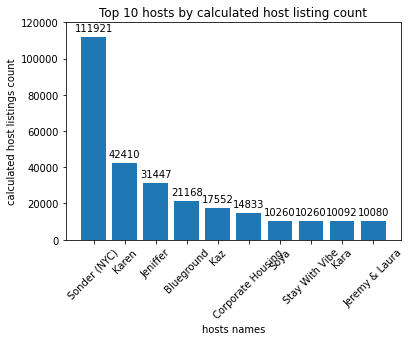

In [26]:
hosts=df.groupby("host name")["calculated host listings count"].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"])
plt.bar_label(hosts_bar,label=round(hosts.loc[:,"calculated host listings count"],2),label_type='edge',padding=4)
plt.ylim(0,120000)
plt.ylabel("calculated host listings count")
plt.xlabel("hosts names")
plt.title("Top 10 hosts by calculated host listing count")
plt.xticks(rotation=45)
plt.show()

In [27]:
review=df.groupby("host_identity_verified")["review rate number"].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


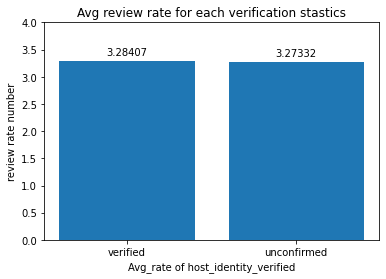

In [28]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"])
plt.bar_label(review_bar,label=round(review.loc[:,"review rate number"],2),label_type='edge',padding=4)
plt.ylim([0,4])
plt.ylabel("review rate number")
plt.xlabel("Avg_rate of host_identity_verified")
plt.title("Avg review rate for each verification stastics")
plt.show()

<Axes: xlabel='host_identity_verified', ylabel='review rate number'>

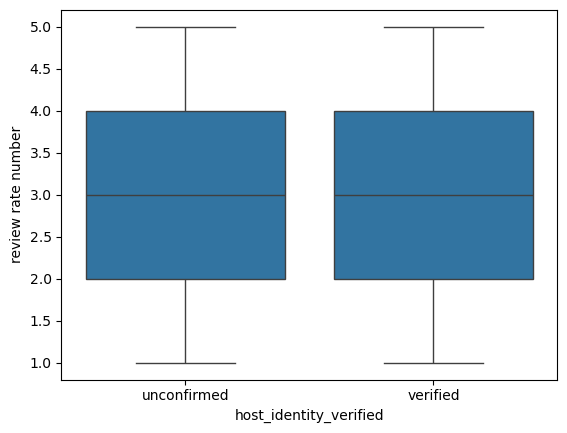

In [52]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color)

In [29]:
df["price_$"].corr(df["service_fee_$"])

0.9999909082976466

<Axes: xlabel='price_$', ylabel='service_fee_$'>

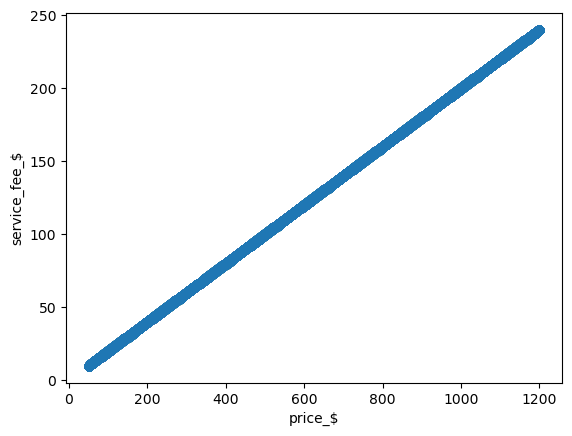

In [56]:
sns.regplot(df,x="price_$",y="service_fee_$")

In [30]:
ARRN=df.groupby(["neighbourhood group","room type"])["review rate number"].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274728
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286
brookln             Private room               4.000000

<Axes: xlabel='neighbourhood group', ylabel='review rate number'>

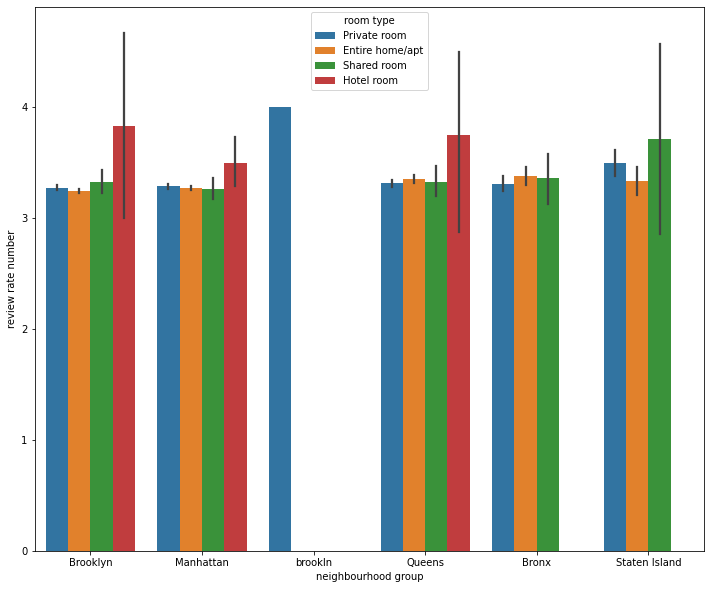

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(data=df,x="neighbourhood group",y="review rate number",hue="room type")

<Axes: xlabel='calculated host listings count', ylabel='availability 365'>

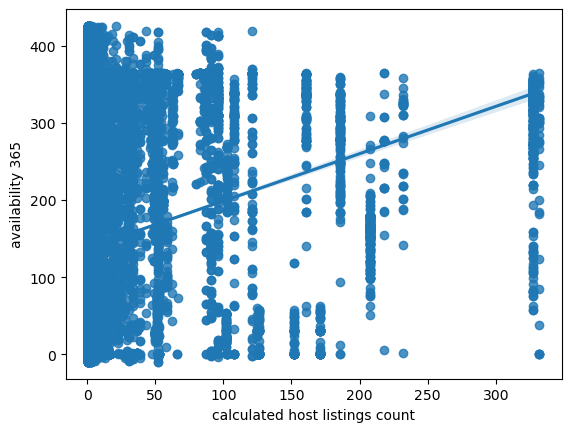

In [60]:
sns.regplot(df,x="calculated host listings count",y="availability 365")

In [32]:
df["calculated host listings count"].corr(df["availability 365"])

0.1359971471570339

# Conclusion
* This Airbnb dataset analysis reveals a comprehensive picture of the New York City short-term rental market. The data shows a mature market dominated by entire homes and private rooms, primarily concentrated in Brooklyn and Manhattan. The cleaning process was extensive but necessary, resulting in a high-quality dataset for further analysis.

* The pricing structure suggests a premium market with significant service fees, while the availability patterns indicate many properties are used frequently for short-term rentals. The concentration in specific boroughs and property types could inform business strategies for both hosts and platform operators.